# Titanic Passenger Survival Classifers
**Author:** Adrianna Webb  
**Date:** November, 9, 2025
**Objective:** Evaluate three classifers performance for predicting passenger survival.


## Introduction
The Titanic dataset is used to build and evaluate three classifiers: Decision Tree, Support Vector Machine, and Neural Network. The goal is to compare model performance across three different feature sets and reflect on their effectiveness for predicting passenger survival.

## Section 1. Import and Inspect the Data
In the code cell below, import the necessary Python libraries for this notebook.  
Load the titanic dataset from the directly from the seaborn library for consistency and simplicity.

In [2]:
# all imports at the top, organized
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')
# Display a few records to verify
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation
### 2.1 Handle Missing Values and Clean Data

In [4]:
# Impute missing values for age using the median:

median_age = titanic['age'].median()
titanic['age'] = titanic['age'].fillna(median_age)

#Fill in missing values for embark_town using the mode:

mode_embark = titanic['embark_town'].mode()[0]
titanic['embark_town'] = titanic['embark_town'].fillna(mode_embark)

### 2.2 Feature Engineering

In [5]:
# Create new feature
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Map categories to numeric values
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

## Section 3. Feature Selection and Justification
### 3.1 Choose features and target
Case 1: 

- input features: alone
- target: survived

Case 2:

- input features: age
- target: survived

Case 3:

- input features: age and family_size 
- target: survived

### 3.2 Define X (features) and y (target)

In [6]:
# Case 1: Feature = alone

# Select the feature 'alone' as input
X1 = titanic[['alone']]

# Select 'survived' as the target for the same rows
y1 = titanic['survived']

In [7]:
# Case 2: Feature = age (drop if na or not available)

# Select the feature 'age', but drop rows where age is missing
X2 = titanic[['age']].dropna()

# Select the matching 'survived' values using the same index
y2 = titanic.loc[X2.index, 'survived']

In [8]:
# Case 3: Features = Age + Family Size (drop if na or not available)

# Select both 'age' and 'family_size', and drop rows where missing (na)
X3 = titanic[['age', 'family_size']].dropna()

# Select the corresponding 'survived' values for those rows
y3 = titanic.loc[X3.index, 'survived']

#### Reflection for section 3: 
1. Why are these features selected? 
   1. The three features selected represent different types of information about Titanic passengers. "Alone" is a binary indicator of whether a passenger traveled solo, which may reflect both socioeconomic status and priorities during evacuation (individuals vs families). "Age" is a continuous variable that could influence survival through multiple factors: children may have been prioritized in lifeboats, while elderly passengers may have had difficulty evacuating. "Family_size" combines sibsp and parch to capture the total number of family members traveling together, which could affect survival both positively (mutual assistance) and negatively (larger groups might be harder to evacuate together).
2. Are there features that are likely to be highly predictive of survival?
   1. Historical accounts of the Titanic disaster suggest that age and sex were highly predictive of survival due to the "women and children first" evacuation protocol. While we didn't use sex as a feature in our selected cases, age should be highly predictive for identifying children who were prioritized. Family size could also be predictive since traveling alone versus with family may have affected evacuation decisions and access to information during the crisis. The "alone" feature serves as a proxy for this social dynamic. However, other features not explored here, such as passenger class (pclass) and sex, are historically known to be even stronger predictors of survival, as first-class passengers and women had significantly higher survival rates.


## Section 4. Train a Classification Model (Decision Tree)

### 4.1 Split the Data
 StratifiedShuffleSplit ensures that both training and test sets have a similar proportion of each class (survived = 0 or 1)

In [9]:
# Case 1: Feature = alone
splitter1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx1, test_idx1 in splitter1.split(X1, y1):

    X1_train = X1.iloc[train_idx1]
    X1_test  = X1.iloc[test_idx1]
    y1_train = y1.iloc[train_idx1]
    y1_test  = y1.iloc[test_idx1]

print('Case 1 - Alone:')
print('Train size:', len(X1_train), '| Test size:', len(X1_test))

Case 1 - Alone:
Train size: 712 | Test size: 179


In [10]:
# Case 2: Feature = age
splitter2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx2, test_idx2 in splitter2.split(X2, y2):
    X2_train = X2.iloc[train_idx2]
    X2_test  = X2.iloc[test_idx2]
    y2_train = y2.iloc[train_idx2]
    y2_test  = y2.iloc[test_idx2]

print('Case 2 - Age:')
print('Train size:', len(X2_train), '| Test size:', len(X2_test))

Case 2 - Age:
Train size: 712 | Test size: 179


In [11]:
# Case 3: Features = age + family_size
splitter3 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx3, test_idx3 in splitter3.split(X3, y3):
    X3_train = X3.iloc[train_idx3]
    X3_test  = X3.iloc[test_idx3]
    y3_train = y3.iloc[train_idx3]
    y3_test  = y3.iloc[test_idx3]

print('Case 3 - Age + Family Size:')
print('Train size:', len(X3_train), '| Test size:', len(X3_test))


Case 3 - Age + Family Size:
Train size: 712 | Test size: 179


### 4.2 Create and Train Model (Decision Tree)

In [12]:
# CASE 1: Decision Tree using alone
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
# CASE 2: Decision Tree using age
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
# CASE 3: Decision Tree using age and family_size
tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 4.3 Predict and Evaluate Model Performance

In [15]:
# Predict on training data
y1_pred = tree_model1.predict(X1_train)
print("Results for Decision Tree on training data (Case 1 - alone):")
print(classification_report(y1_train, y1_pred))

# Predict on test data
y1_test_pred = tree_model1.predict(X1_test)
print("Results for Decision Tree on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_test_pred))

Results for Decision Tree on training data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712

Results for Decision Tree on test data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [16]:
# Predict on training data
y2_pred = tree_model2.predict(X2_train)
print("Results for Decision Tree on training data (Case 2 - age):")
print(classification_report(y2_train, y2_pred))

# Predict on test data
y2_test_pred = tree_model2.predict(X2_test)
print("Results for Decision Tree on test data (Case 2 - age):")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree on training data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712

Results for Decision Tree on test data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



In [17]:
# Predict on training data
y3_pred = tree_model3.predict(X3_train)
print("Results for Decision Tree on training data (Case 3 - age + family_size):")
print(classification_report(y3_train, y3_pred))

# Predict on test data
y3_test_pred = tree_model3.predict(X3_test)
print("Results for Decision Tree on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_test_pred))

Results for Decision Tree on training data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712

Results for Decision Tree on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       110
           1       0.46      0.35      0.40        69

    accuracy                           0.59       179
   macro avg       0.55      0.55      0.54       179
weighted avg       0.57      0.59      0.58       179



### 4.4 Report Confusion Matrix (as a heatmap)

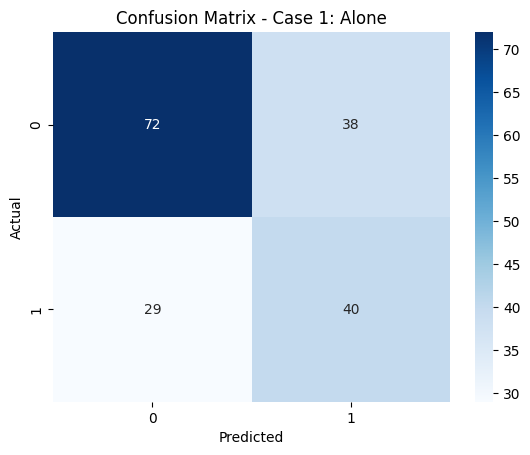

In [18]:
# Create confusion matrix for test predictions (Case 1)
cm1 = confusion_matrix(y1_test, y1_test_pred)

# Plot heatmap
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 1: Alone')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

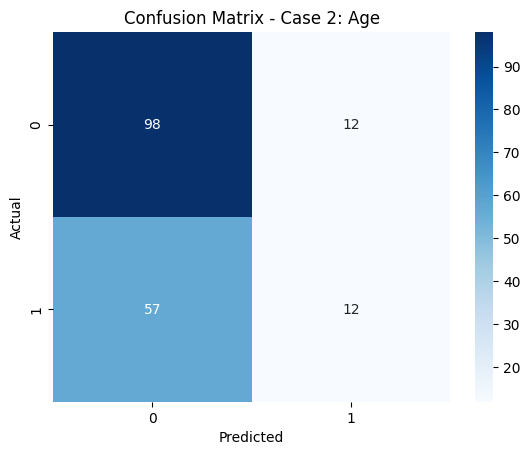

In [19]:
# Create confusion matrix for test predictions (Case 2)
cm2 = confusion_matrix(y2_test, y2_test_pred)

# Plot heatmap
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 2: Age')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

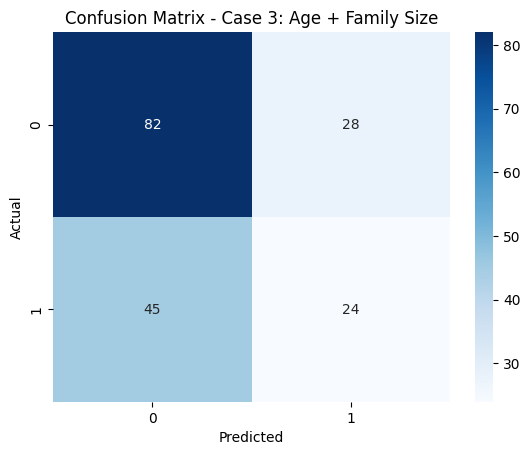

In [20]:
# Create confusion matrix for test predictions (Case 3)
cm3 = confusion_matrix(y3_test, y3_test_pred)

# Plot heatmap
sns.heatmap(cm3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 3: Age + Family Size')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.5 Report Decision Tree Plot

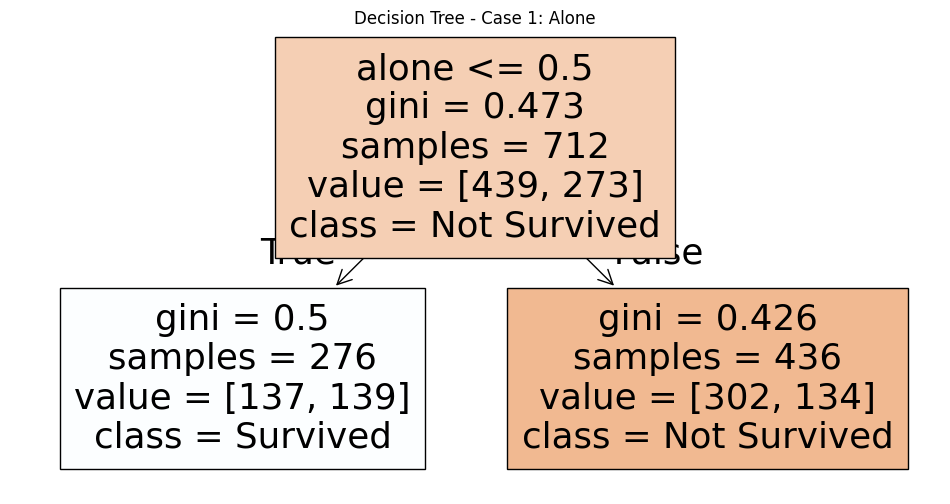

In [21]:

# Plot Decision Tree for Case 1
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model1,
          feature_names=X1.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 1: Alone")
plt.show()

# Save image
fig.savefig("tree_case1_alone.png")

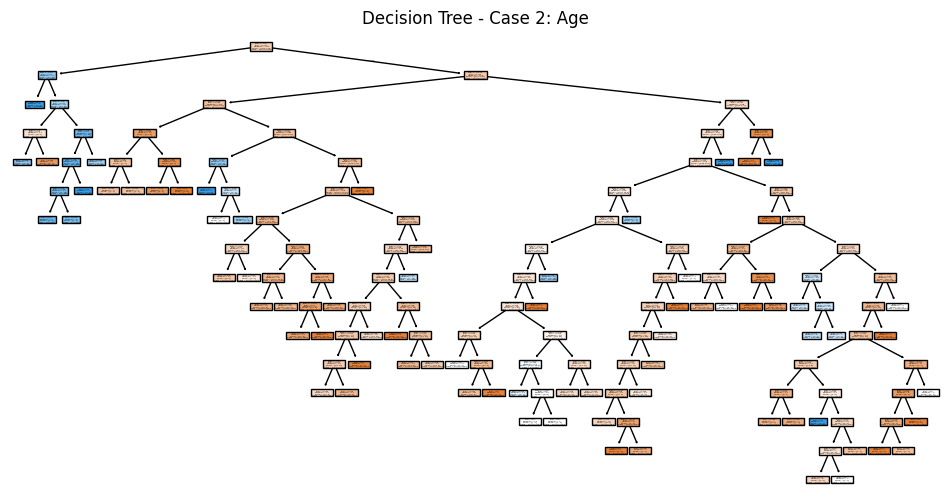

In [22]:
# Plot Decision Tree for Case 2
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model2,
          feature_names=X2.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 2: Age")
plt.show()

# Save image
fig.savefig("tree_case2_age.png")

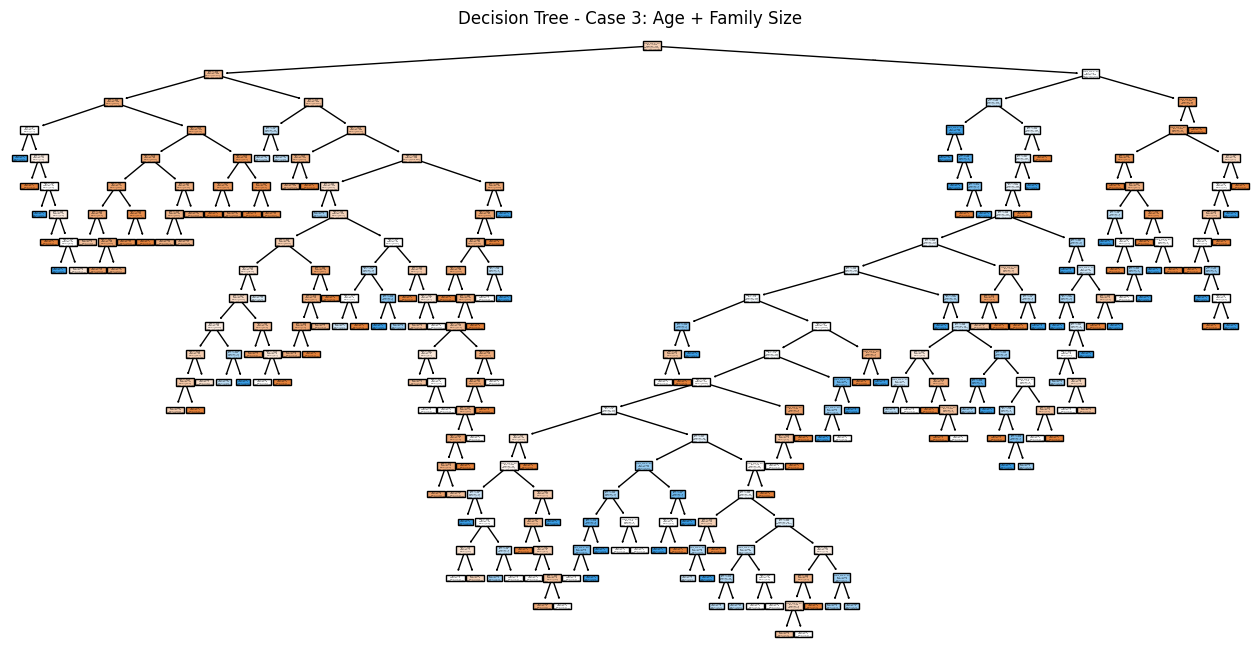

In [23]:
# Plot Decision Tree for Case 3
fig = plt.figure(figsize=(16, 8))
plot_tree(tree_model3,
          feature_names=X3.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 3: Age + Family Size")
plt.show()

# Save image
fig.savefig("tree_case3_age_family.png")

| Case | Features | Train Accuracy | Test Accuracy | Class 0 F1 | Class 1 F1 | Overall Performance |
|------|----------|----------------|---------------|------------|------------|---------------------|
| 1 | alone | 0.62 | 0.63 | 0.68 | 0.54 | Moderate - simple binary feature |
| 2 | age | 0.68 | 0.61 | 0.74 | 0.25 | Poor - struggles with survivors |
| 3 | age + family_size | 0.77 | 0.59 | 0.69 | 0.40 | Best training, but overfitting |

#### Reflection 4:
1. How well did the different cases perform?
   1. The Decision Tree performed differently across the three cases. Case 1 (alone) achieved 63% test accuracy with reasonably balanced performance between classes (F1-scores of 0.68 and 0.54). Case 2 (age) showed 61% test accuracy but struggled significantly with identifying survivors, achieving only 0.25 F1-score for class 1. Case 3 (age + family_size) had the highest training accuracy at 77% but dropped to 59% on test data, indicating overfitting. However, Case 3 still performed better at identifying survivors (0.40 F1-score) compared to Case 2.
2. Are there any surprising results?
   1. The most surprising result was that Case 2 (using age alone) performed worse than Case 1 (using the simple binary "alone" feature), despite age being a continuous variable with more information. Case 2's recall for survivors was only 0.17, meaning it missed 83% of people who actually survived. Additionally, Case 3 showed a large gap between training accuracy (77%) and test accuracy (59%), revealing significant overfitting. The decision tree was memorizing training patterns rather than learning generalizable rules, likely because with two features the tree became too complex and overfit to noise in the training data.
3. Which inputs worked better? 
   1. For balanced, generalizable performance, Case 1 (alone) worked best with consistent accuracy between training (62%) and testing (63%) and reasonable performance on both classes. Case 3 (age + family_size) showed the most potential, achieving the best recall for survivors (0.35) and highest training accuracy, but would benefit from regularization techniques like limiting max_depth or min_samples_split to reduce overfitting. Case 2 (age alone) was the weakest performer, suggesting that age by itself doesn't provide enough discriminative power for the decision tree to make good predictions about survival.


## Section 5. Compare Alternative Models (SVC, NN)

In [24]:
# CASE 1: SVC using 'alone'
svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)
print("Results for SVC on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_svc_pred))

Results for SVC on test data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [27]:
# CASE 2: SVC using 'age'
svc_model2 = SVC()
svc_model2.fit(X2_train, y2_train)
y2_svc_pred = svc_model2.predict(X2_test)
print("Results for SVC on test data (Case 2 - age):")
print(classification_report(y2_test, y2_svc_pred))

Results for SVC on test data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



In [28]:
# CASE 3: SVC using 'Age + Family Size'
svc_model3 = SVC()
svc_model3.fit(X3_train, y3_train)
y3_svc_pred = svc_model3.predict(X3_test)
print("Results for SVC on test data (Case 3 - Age + Family Size):")
print(classification_report(y3_test, y3_svc_pred))

Results for SVC on test data (Case 3 - Age + Family Size):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



### 5.2 Visualize Support Vectors (1D Case 1 and 2D Case 3)

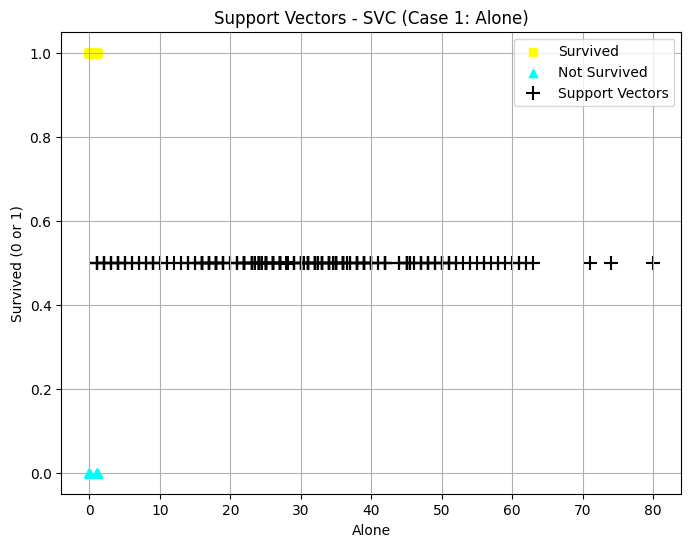

In [29]:

# Visualize support vectors for Case 1 (feature = 'alone')

# Create groups based on survival
survived_alone = X1_test.loc[y1_test == 1, 'alone']
not_survived_alone = X1_test.loc[y1_test == 0, 'alone']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))

plt.scatter(survived_alone, y1_test.loc[y1_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_alone, y1_test.loc[y1_test == 0], c='cyan', marker='^', label='Not Survived')

# Overlay support vectors
# Check if the model has support_vectors_ (it may not if it failed to converge)
if hasattr(svc_model1, 'support_vectors_'):
    # Get the X-values of the support vectors (only one feature in Case 1
    support_x = svc_model1.support_vectors_[:, 0]  # First feature (alone)
    # Plot them using a fixed Y-value (0.5) to place them between classes visually
    # We use a larger size (s=100) and a plus symbol to make them stand out
    plt.scatter(support_x, [0.5] * len(support_x), c='black', marker='+', s=100, label='Support Vectors')

# Add labels and legend
plt.xlabel('Alone')
plt.ylabel('Survived (0 or 1)')
plt.title('Support Vectors - SVC (Case 1: Alone)')
plt.legend()
plt.grid(True)
plt.show()

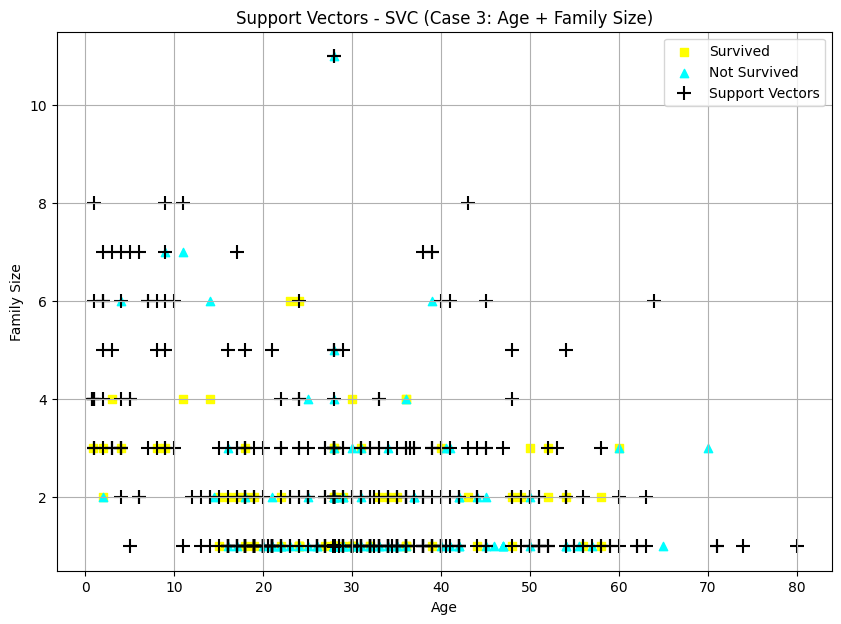

In [30]:
# Visualize support vectors for Case 3 (features = 'age', 'family_size')

# Create groups based on survival
survived = X3_test[y3_test == 1]
not_survived = X3_test[y3_test == 0]

# Create scatter plot
plt.figure(figsize=(10, 7))

# Plot survived (yellow squares)
plt.scatter(survived['age'], survived['family_size'],
            c='yellow', marker='s', label='Survived')

# Plot not survived (cyan triangles)
plt.scatter(not_survived['age'], not_survived['family_size'],
            c='cyan', marker='^', label='Not Survived')

# Overlay support vectors
if hasattr(svc_model3, 'support_vectors_'):
    support_vectors = svc_model3.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                c='black', marker='+', s=100, label='Support Vectors')

# Add labels, title, and legend
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Support Vectors - SVC (Case 3: Age + Family Size)')
plt.legend()
plt.grid(True)
plt.show()

### Next: Section 5.3 - Train Neural Network on Case 3

In [31]:
# Train NN for Case 3 (age + family_size)
nn_model3 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

nn_model3.fit(X3_train, y3_train)

# Predict on test data (Case 3)
y3_nn_pred = nn_model3.predict(X3_test)

# Print classification report
print("Results for Neural Network on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_nn_pred))

Results for Neural Network on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       110
           1       0.60      0.41      0.48        69

    accuracy                           0.66       179
   macro avg       0.64      0.62      0.62       179
weighted avg       0.65      0.66      0.65       179



In [35]:
# Try different SVC kernels on Case 3

# 1. Linear Kernel
svc_linear = SVC(kernel='linear')
svc_linear.fit(X3_train, y3_train)
y3_linear_pred = svc_linear.predict(X3_test)

print("Results for SVC with LINEAR kernel (Case 3):")
print(classification_report(y3_test, y3_linear_pred))
print("\n" + "="*60 + "\n")

# 2. Polynomial Kernel (degree=3)
svc_poly = SVC(kernel='poly', degree=3)
svc_poly.fit(X3_train, y3_train)
y3_poly_pred = svc_poly.predict(X3_test)

print("Results for SVC with POLYNOMIAL kernel (Case 3):")
print(classification_report(y3_test, y3_poly_pred))
print("\n" + "="*60 + "\n")

# 3. Sigmoid Kernel
svc_sigmoid = SVC(kernel='sigmoid')
svc_sigmoid.fit(X3_train, y3_train)
y3_sigmoid_pred = svc_sigmoid.predict(X3_test)

print("Results for SVC with SIGMOID kernel (Case 3):")
print(classification_report(y3_test, y3_sigmoid_pred))

Results for SVC with LINEAR kernel (Case 3):
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



Results for SVC with POLYNOMIAL kernel (Case 3):
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



Results for SVC with SIGMOID kernel (Case 3):
              precision    recall  f1-score   support

           0       0.64      0.61      0.62       110
           1       0.42      0.45      0.43        69

    accuracy                          

c:\Users\adria\Repos\applied-ml-webb\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\adria\Repos\applied-ml-webb\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\adria\Repos\applied-ml-webb\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

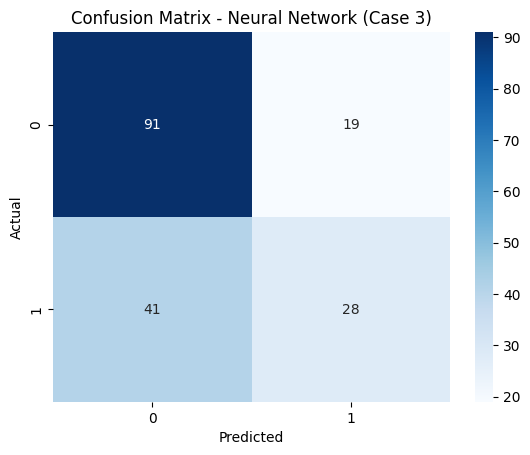

In [32]:
# Create confusion matrix
cm_nn3 = confusion_matrix(y3_test, y3_nn_pred)

# Plot heatmap
sns.heatmap(cm_nn3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Neural Network (Case 3)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 5.4 Visualize (Neural Network on Case 3)

c:\Users\adria\Repos\applied-ml-webb\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


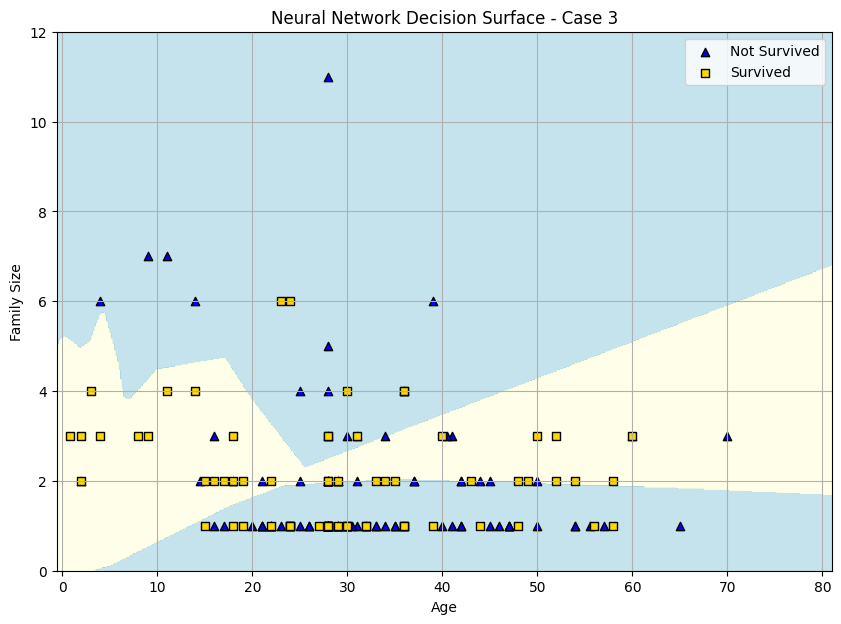

In [34]:
import numpy as np
from matplotlib.colors import ListedColormap

# Get the range of our two features - use padding to enhance appearance
padding = 1
x_min, x_max = X3['age'].min() - padding, X3['age'].max() + padding
y_min, y_max = X3['family_size'].min() - padding, X3['family_size'].max() + padding

# Create a meshgrid (all combinations of age and family_size)
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                      np.linspace(y_min, y_max, 500))

# Predict survival for every point in the grid
Z = nn_model3.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted results to match the original 2D grid shape
Z = Z.reshape(xx.shape)

# Plot the decision surface (background) showing predicted survival zones
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(['lightblue', 'lightyellow'])
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.7)

# Overlay the actual test data points
plt.scatter(X3_test['age'][y3_test == 0], 
            X3_test['family_size'][y3_test == 0],
            c='blue', marker='^', edgecolor='k', label='Not Survived')

plt.scatter(X3_test['age'][y3_test == 1], 
            X3_test['family_size'][y3_test == 1],
            c='gold', marker='s', edgecolor='k', label='Survived')

# Add labels, title, legend, and grid
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Neural Network Decision Surface - Case 3')
plt.legend()
plt.grid(True)
plt.show()

### Reflection 5: Model Performance Comparison
1. How well did each of these new models/cases perform?
   1. The SVC models achieved 63% accuracy across all three cases, but with a critical flaw: in Cases 2 and 3, the SVC identified only 7% of survivors (recall = 0.07). The model essentially predicted "not survived" for almost everyone, inflating overall accuracy while providing little useful predictive power. The Neural Network on Case 3 performed significantly better with 66% accuracy and balanced results. It identified 41% of survivors and achieved an F1-score of 0.48 for the survived class versus the SVC's 0.13. After experimenting with different SVC kernels, the sigmoid kernel significantly outperformed the default RBF. While sigmoid achieved lower overall accuracy (55% vs 63%), it found 45% of survivors compared to RBF's 7%, with an F1-score of 0.43 versus 0.13. The linear and polynomial kernels failed completely, predicting zero survivors and confirming that survival patterns in this dataset are not linearly separable. This demonstrates the importance of kernel selection and shows that overall accuracy can be misleading when class imbalance exists.
2. Are there any surprising results or insights?
   1. The most surprising result was how poorly the SVC performed even after adding continuous features. I expected improvement from Case 1 to Cases 2 and 3, but all three showed identical 63% accuracy with the same class imbalance problem. The decision surface visualization revealed that survival patterns aren't linearly separable. The Neural Network learned that younger passengers with smaller families survived more often, while older passengers or those with large families didn't. This non-linear, wavy decision boundary explains why the SVC struggled. The high density of support vectors scattered across the feature space confirmed the model couldn't find a clear margin between classes.
3. Why might one model outperform the others?
   1. The Neural Network outperformed the SVC due to its ability to learn non-linear decision boundaries through multiple hidden layers (50, 25, 10 neurons). These layers could capture complex interactions between age and family_size that the default RBF kernel couldn't handle effectively. The 'lbfgs' solver used for the Neural Network is particularly effective for smaller datasets, allowing good convergence within 1000 iterations. The SVC's default configuration wasn't suited to this dataset where classes overlap significantly. Different SVC kernels or adjusted hyperparameters might have improved performance, but out-of-the-box, the Neural Network was clearly superior for this classification task.

## Section 6 Final Thoughts and Insights

### Summary of All Models

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| Decision Tree | Case 1 | alone | 63% | 64% | 63% | 63% | Balanced performance |
|                   | Case 2 | age | 61% | 58% | 61% | 55% | Poor survivor recall (17%) |
|                   | Case 3 | age + family_size | 59% | 57% | 59% | 58% | Overfitting (77% train accuracy) |
|-------------------|------|---------------|----------|----------|-------|----------|-------|
| SVM (RBF Kernel)| Case 1 | alone | 63% | 64% | 63% | 63% | Same as Decision Tree Case 1 |
|                    | Case 2 | age | 63% | 66% | 63% | 52% | Only 7% survivor recall |
|                    | Case 3 | age + family_size | 63% | 66% | 63% | 52% | Only 7% survivor recall |
|-------------------|------|---------------|----------|----------|-------|----------|-------|
| SVM (Linear Kernel) | Case 1 | alone | - | - | - | - | Not run |
|                    | Case 2 | age | - | - | - | - | Not run |
|                    | Case 3 | age + family_size | 61% | 38% | 61% | 47% | Predicted ZERO survivors |
|-------------------|------|---------------|----------|----------|--------|----------|-------|
| SVM (Poly Kernel) | Case 1 | alone | - | - | - | - | Not run |
|                    | Case 2 | age | - | - | - | - | Not run |
|                    | Case 3 | age + family_size | 61% | 38% | 61% | 47% | Predicted ZERO survivors |
|-------------------|------|---------------|----------|----------|-------|----------|-------|
| SVM (Sigmoid Kernel) | Case 1 | alone | - | - | - | - | Not run |
|                    | Case 2 | age | - | - | - | - | Not run |
|                    | Case 3 | age + family_size | 55% | 55% | 53% | 53% | Best SVM - 45% survivor recall |
|-------------------|------|---------------|----------|----------|-------|----------|-------|
| Neural Network (MLP) | Case 1 | alone | - | - | - | - | Not run |
|                    | Case 2 | age | - | - | - | - | Not run |
|                    | Case 3 | age + family_size | 66% | 65% | 66% | 65% | Best overall model |

### Challenges Encountered

**Class Imbalance and Evaluation Metrics**

The most significant challenge was dealing with class imbalance in the Titanic dataset, where more passengers died than survived (110 vs 69 in the test set). This imbalance caused several models, particularly the default SVC configurations, to achieve deceptively high accuracy by simply predicting the majority class. I learned that accuracy alone is misleading and that examining precision, recall, and F1-scores for each class separately is essential. The SVC models with linear, polynomial, and default RBF kernels all showed this problem, achieving 61-63% accuracy while completely failing to identify survivors.

**Model Selection and Hyperparameter Tuning**

Choosing appropriate models and configurations proved challenging. The default SVC with RBF kernel performed poorly on Cases 2 and 3, achieving only 7% recall for survivors despite 63% overall accuracy. Experimenting with different kernels revealed that the sigmoid kernel worked much better for this dataset, improving survivor recall to 45%. This taught me that default settings don't always work and that systematic experimentation with hyperparameters is necessary. The Decision Tree in Case 3 also demonstrated overfitting, with training accuracy of 77% dropping to 59% on test data, highlighting the need for regularization techniques.

**Feature Engineering and Selection**

Determining which features to use and how to encode them presented another challenge. The binary "alone" feature provided surprisingly good baseline performance, while age alone struggled despite being a continuous variable with more information. Combining age with family size improved results but introduced overfitting in the Decision Tree. Additionally, converting categorical variables like sex and embarked to numeric values required careful consideration of the encoding scheme. The relatively small dataset size (179 test samples) meant that small changes in feature selection could significantly impact model performance, making it difficult to draw definitive conclusions about which features were truly most predictive.

### Next Steps for Improvement

**Incorporate Additional Features**

The most impactful next step would be to include additional features that historical records suggest were highly predictive of survival. Specifically, adding passenger class (pclass) and sex would likely improve model performance substantially, as the "women and children first" evacuation protocol and class-based access to lifeboats were major factors in survival. The embark_town feature could also provide additional signal about socioeconomic status. Testing these features individually and in combination with age and family_size would help identify the optimal feature set.
